# Preprocessing

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
print(" loading Packages .....")

 loading Packages .....


## Loading dataset

In [2]:
Data = 'breast-cancer.data'
Names = ['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
Dataset = pd.read_csv(Data,header=None,names=Names)

In [3]:
Dataset.head(10) # Return the first n rows.
#Dataset

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,NaN,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,NaN,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2.0,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2.0,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1.0,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2.0,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,right,left_up,no


## Missing data

In [4]:
Dataset.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      6
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
#from sklearn.preprocessing import Imputer was deprecated with scikit-learn v0.20.4 and removed as of v0.22.2.


newshape : int or tuple of ints

The new shape should be compatible with the original shape. If an integer, then the result will be a 1-D array of that length. One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.

<b> It simply means that it is an unknown dimension and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the given mentioned criteria</b>

for mor info check : https://stephanosterburg.gitbook.io/scrapbook/coding/python/what-does-1-mean-in-numpy-reshape


In [6]:
missing = Dataset['deg-malig'].values.reshape(-1,1)
Dataset['deg-malig'] = imputer.fit_transform(missing)

In [7]:
Dataset.head(10) #   Return the first n rows.

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,2.0,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2.0,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2.0,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1.0,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2.0,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,right,left_up,no


In [9]:
Dataset.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [10]:
X = Dataset.iloc[:,:-1]
y = Dataset.iloc[:,9]
#property DataFrame.iloc¶ Purely integer-location based indexing for selection by position

## Categorical Data

### LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorcial_feature_mask = X.dtypes==object
categorcial_cols = X.columns[categorcial_feature_mask].tolist()
X[categorcial_cols] = X[categorcial_cols].apply(lambda col:encoder.fit_transform(col))
X.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,0,1,2,5,0,1,2.0,0,2
1,0,2,2,3,0,1,2.0,1,5
2,0,2,2,3,0,1,2.0,0,2
3,0,4,0,2,0,1,2.0,1,3
4,0,2,2,0,0,1,2.0,1,4
5,0,4,0,2,0,1,2.0,0,2
6,0,3,2,4,0,1,2.0,0,2
7,0,4,0,3,0,1,1.0,0,2
8,0,2,2,10,0,1,2.0,0,2
9,0,2,2,3,0,1,2.0,1,3


### OneHotEncoder

In [12]:
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
#ohe = OneHotEncoder(categorical_features = categorcial_feature_mask, sparse=False)
X = encoder.fit_transform(X)
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## Split Data to Train and Test

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

## Feature Scaling

### MinMaxScaler

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

### Standardization

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train

array([[ 0.63910148, -0.63910148,  0.        , ..., -0.73379939,
        -0.31448545, -0.38655567],
       [ 0.63910148, -0.63910148,  0.        , ..., -0.73379939,
        -0.31448545, -0.38655567],
       [ 0.63910148, -0.63910148,  0.        , ..., -0.73379939,
        -0.31448545, -0.38655567],
       ...,
       [ 0.63910148, -0.63910148,  0.        , ...,  1.36277029,
        -0.31448545, -0.38655567],
       [-1.56469673,  1.56469673,  0.        , ..., -0.73379939,
         3.17979734, -0.38655567],
       [ 0.63910148, -0.63910148,  0.        , ..., -0.73379939,
         3.17979734, -0.38655567]])

### Normalization

In [16]:
from sklearn.preprocessing import Normalizer
norm_X = Normalizer()
X_train = norm_X.fit_transform(X_train)
X_test = norm_X.transform(X_test)
X_train

array([[ 0.07123759, -0.07123759,  0.        , ..., -0.08179312,
        -0.03505419, -0.04308752],
       [ 0.14464776, -0.14464776,  0.        , ..., -0.16608073,
        -0.07117745, -0.0874891 ],
       [ 0.06995069, -0.06995069,  0.        , ..., -0.08031553,
        -0.03442094, -0.04230915],
       ...,
       [ 0.14531964, -0.14531964,  0.        , ...,  0.30986829,
        -0.07150807, -0.08789548],
       [-0.20988616,  0.20988616,  0.        , ..., -0.09843079,
         0.42653342, -0.05185202],
       [ 0.12146861, -0.12146861,  0.        , ..., -0.13946704,
         0.60435716, -0.07346936]])

# Feature Engineering

## Feature Transformation

### Binarization

In [20]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Dataset['node-caps']= lb.fit_transform(Dataset['node-caps'])
Dataset['node-caps']

0      0
1      0
2      0
3      0
4      0
      ..
281    0
282    0
283    0
284    0
285    0
Name: node-caps, Length: 286, dtype: int32

In [23]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)
y = np.concatenate(y,axis=0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

### PCA

#### 2D Visualization

In [73]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

Text(0.5, 1.0, 'PCA of Breast Cancer Dataset')

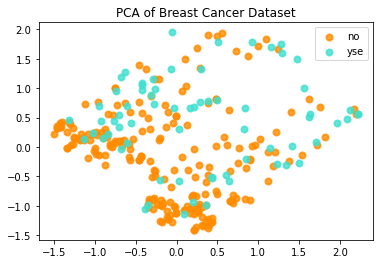

In [74]:
target_names = ['no','yse']

plt.figure()
colors = ['darkorange','turquoise']

for color, i, target_names in zip(colors, [0,1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha= .8, lw=2, label= target_names)

plt.legend(scatterpoints=1)
plt.title("PCA of Breast Cancer Dataset")

#### 3D Visualization

In [75]:
pca3 = PCA(n_components=3)
X_r3 = pca3.fit_transform(X)

<Figure size 432x288 with 0 Axes>

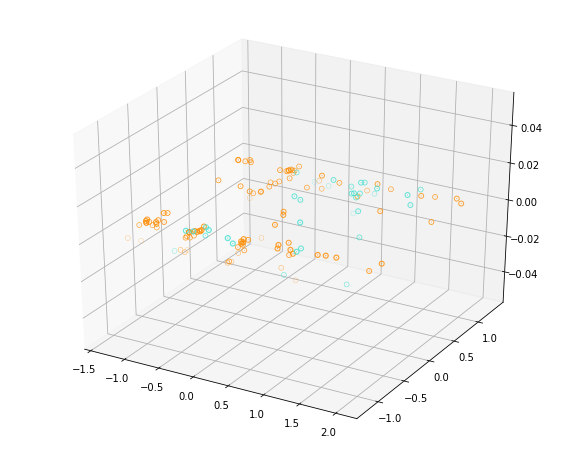

In [19]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure()
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111,projection='3d')

for color, i, target_name in zip(colors,[0,1],target_names):
    plt.scatter(X_r3[y == i, 0],X_r3[y == i, 1],X_r3[y == i, 2],color=color, alpha=.8,lw=5,label=target_name)
    
plt.show()

#### Explained Variance

In [76]:
pca3.explained_variance_ratio_

array([0.1352274 , 0.13144592, 0.10988892])

In [77]:
pca3.explained_variance_ratio_.sum()

0.37656224474471756